In [2]:
import numpy as np
from scipy.signal import convolve2d, fftconvolve
from datetime import datetime
import random

# create random data
# ouput will be sotred  in a pre-allocated array O, dimension A
def makeData (N=256, numimg=2, M=8, numfilt=3, seed=42):
    np.random.seed(seed)
    I = np.random.rand(N, N, numimg)
    F = np.random.rand(M, M, numfilt)
    O = np.zeros((N, N, numimg, numfilt))
    return I, F, O

# convolve each image with each filter
def c2d (I, F, O):
    for i in range(I.shape[2]):
        for j in range(F.shape[2]):
            O[:,:,i,j] = convolve2d(I[:,:,i], F[:,:,j], mode='same')
    return O

# convolve each image with each filter
def c2dfft (I, F, O):
    for i in range(I.shape[2]):
        for j in range(F.shape[2]):
            O[:,:,i,j] = fftconvolve(I[:,:,i], F[:,:,j], mode='same')
    return O

# compare the two methods
def compare (I, F, O):
    O1 = np.zeros(O.shape)
    O2 = np.zeros(O.shape)
    t1 = datetime.now()
    O1 = c2d(I, F, O1)
    t2 = datetime.now()
    O2 = c2dfft(I, F, O2)
    t3 = datetime.now()
    print('conv2d time: ', t2-t1)
    print('fft2d time: ', t3-t2)

# run the code
I, F, O = makeData()
compare(I, F, O)

conv2d time:  0:00:00.037818
fft2d time:  0:00:00.006788


In [3]:
# experiment the time execution of the two methods repeating the experiment 20 times
img_size = [256, 512, 1024]
filt_size = [8, 16, 32]

def experiment(img_size, filter_size, num_iter=20):

    random.seed(119)
    random_seed = random.sample(range(200), num_iter)

    for i in range(len(img_size)):
        for j in range(len(filter_size)):
            for k in range(num_iter):
                I, F, O = makeData(img_size[i], 2, filter_size[j], 3, random_seed[k])
                compare(I, F, O)

experiment(img_size, filt_size)

conv2d time:  0:00:00.039704
fft2d time:  0:00:00.006518
conv2d time:  0:00:00.036569
fft2d time:  0:00:00.005904
conv2d time:  0:00:00.037088
fft2d time:  0:00:00.006091
conv2d time:  0:00:00.036540
fft2d time:  0:00:00.006554
conv2d time:  0:00:00.048231
fft2d time:  0:00:00.007188
conv2d time:  0:00:00.037036
fft2d time:  0:00:00.006216
conv2d time:  0:00:00.036472
fft2d time:  0:00:00.006108
conv2d time:  0:00:00.036051
fft2d time:  0:00:00.005773
conv2d time:  0:00:00.036601
fft2d time:  0:00:00.006167
conv2d time:  0:00:00.036182
fft2d time:  0:00:00.006288
conv2d time:  0:00:00.036652
fft2d time:  0:00:00.006097
conv2d time:  0:00:00.036078
fft2d time:  0:00:00.005864
conv2d time:  0:00:00.035955
fft2d time:  0:00:00.005995
conv2d time:  0:00:00.037884
fft2d time:  0:00:00.006300
conv2d time:  0:00:00.039313
fft2d time:  0:00:00.006045
conv2d time:  0:00:00.044591
fft2d time:  0:00:00.006335
conv2d time:  0:00:00.037308
fft2d time:  0:00:00.005954
conv2d time:  0:00:00.036680
ff

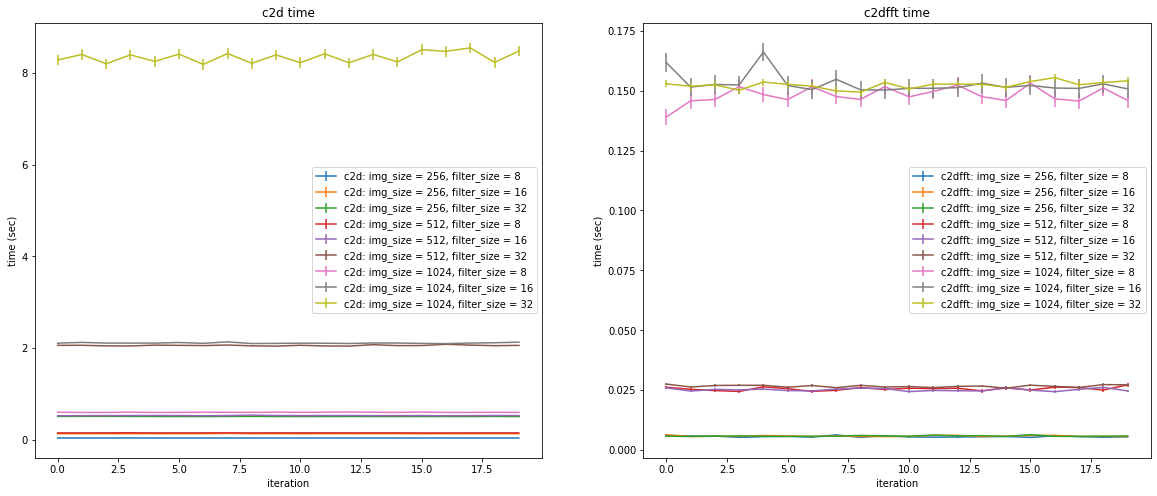

In [4]:
# plot the results with error bars and shading
import matplotlib.pyplot as plt
def plot_results_error(img_size, filter_size, num_iter=20):
    
        random.seed(119)
        random_seed = random.sample(range(200), num_iter)
    
        c2d_time = np.zeros((len(img_size), len(filter_size), num_iter))
        c2dfft_time = np.zeros((len(img_size), len(filter_size), num_iter))
    
        for i in range(len(img_size)):
            for j in range(len(filter_size)):
                for k in range(num_iter):
                    I, F, O = makeData(img_size[i], 2, filter_size[j], 3, random_seed[k])
                    O1 = np.zeros(O.shape)
                    O2 = np.zeros(O.shape)
                    t1 = datetime.now()
                    O1 = c2d(I, F, O1)
                    t2 = datetime.now()
                    O2 = c2dfft(I, F, O2)
                    t3 = datetime.now()
                    c2d_time[i, j, k] = (t2-t1).total_seconds()
                    c2dfft_time[i, j, k] = (t3-t2).total_seconds()
    
        fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    
        for i in range(len(img_size)):
            for j in range(len(filter_size)):
                ax[0].errorbar(range(num_iter), c2d_time[i, j, :], yerr=c2d_time[i, j, :].std(), label='c2d: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
                ax[1].errorbar(range(num_iter), c2dfft_time[i, j, :], yerr=c2dfft_time[i, j, :].std(), label='c2dfft: img_size = ' + str(img_size[i]) + ', filter_size = ' + str(filter_size[j]))
    
        ax[0].set_title('c2d time')
        ax[0].set_xlabel('iteration')
        ax[0].set_ylabel('time (sec)')
        ax[0].legend()
        ax[1].set_title('c2dfft time')
        ax[1].set_xlabel('iteration')
        ax[1].set_ylabel('time (sec)')
        ax[1].legend()
    
        plt.show()

plot_results_error(img_size, filt_size)
